In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data sets_Batch 21/training_set', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 6, class_mode = 'categorical')

Found 148 images belonging to 4 classes.


In [7]:
valid_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data sets_Batch 21/test_set', # relative path from working directoy
                                             target_size = (128, 128),
                                             batch_size = 3, class_mode = 'categorical')

Found 32 images belonging to 4 classes.


In [8]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 20,
                         epochs = 15,

                         )

<ipython-input-8-1779decd1d0c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/15
20/20 [==============================] - 39s 2s/step - loss: 1.6055 - accuracy: 0.2966
Epoch 2/15
20/20 [==============================] - 9s 458ms/step - loss: 1.3308 - accuracy: 0.3000
Epoch 3/15
20/20 [==============================] - 5s 255ms/step - loss: 1.2723 - accuracy: 0.3917
Epoch 4/15
20/20 [==============================] - 4s 188ms/step - loss: 1.2088 - accuracy: 0.5000
Epoch 5/15
20/20 [==============================] - 5s 267ms/step - loss: 1.1332 - accuracy: 0.6017
Epoch 6/15
20/20 [==============================] - 4s 189ms/step - loss: 0.9603 - accuracy: 0.6500
Epoch 7/15
20/20 [==============================] - 4s 186ms/step - loss: 0.9818 - accuracy: 0.5339
Epoch 8/15
20/20 [==============================] - 5s 259ms/step - loss: 0.7702 - accuracy: 0.6667
Epoch 9/15
20/20 [==============================] - 4s 213ms/step - loss: 0.7850 - accuracy: 0.6695
Epoch 10/15
20/20 [==============================] - 6s 287ms/step - loss: 0.8302 - accuracy: 0.6271
E

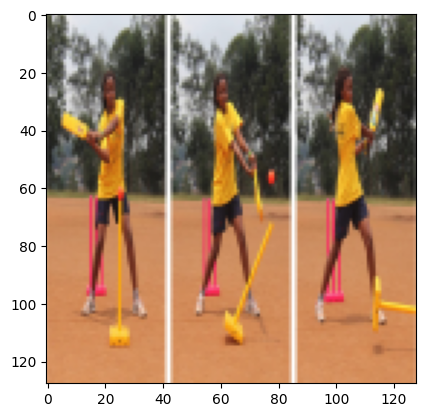

In [9]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Data sets_Batch 21/training_set/Pull_Shot/pull_shot(16).jpg')
img_resize = cv2.resize(img, (128,128),interpolation=cv2.INTER_AREA)


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize)       # get b,g,r
rgb_img2 = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img2)

In [10]:
label_map = (training_set.class_indices)

label_map

{'Cover_Drive': 0, 'Pull_Shot': 1, 'Sweep_Shot': 2, 'Upper_Cut': 3}

In [11]:
img_rank2 = np.expand_dims(rgb_img2/255, axis=0)

classifier.predict(img_rank2)

1/1 [==============================] - 0s 136ms/step


array([[4.5994713e-04, 9.9920309e-01, 9.9403328e-01, 9.9194276e-01]],
      dtype=float32)

In [12]:
predict_x=classifier.predict(img_rank2)
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 40ms/step


In [13]:
list(label_map.keys())[classes_x[0]]

'Pull_Shot'

1/1 [==============================] - 0s 31ms/step


'Sweep_Shot'

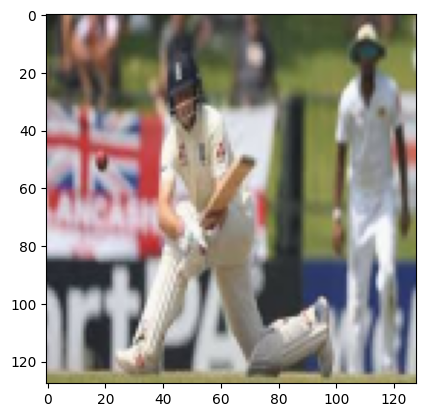

In [14]:
img = cv2.imread('/content/drive/MyDrive/Data sets_Batch 21/training_set/Sweep_Shot/images (1).jpeg')
img_resize1 = cv2.resize(img, (128,128),interpolation=cv2.INTER_AREA)


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize1)       # get b,g,r
rgb_img1 = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img1)

img_rk = np.expand_dims(rgb_img1/255, axis=0)

predict_x=classifier.predict(img_rk)
classes_x=np.argmax(predict_x,axis=1)
list(label_map.keys())[classes_x[0]]